# **CV Lab 2: Morphological Operations**

Name: Shwetha Iyer

Batch: A4

PRN: 1032211195


In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab.patches import cv2_imshow

# ***Lab Task 1:  Perform Erosion on figure such that all balls get separated from each other.***

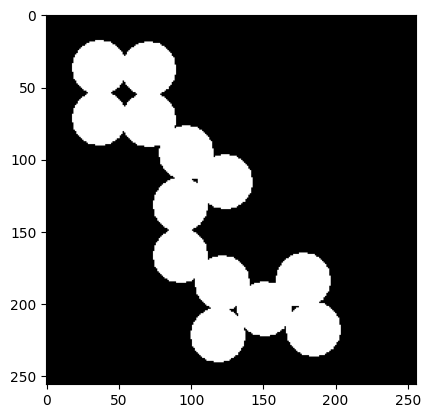

In [5]:
img = cv2.imread('circles.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

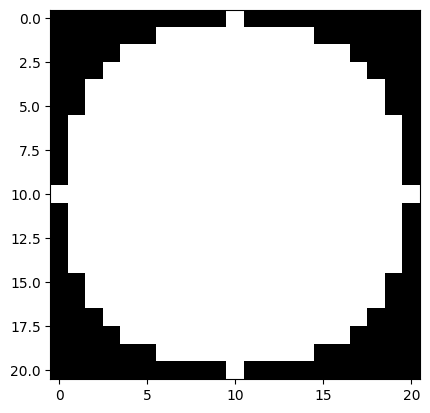

In [69]:
# Defining circular structuring element
def disc_kernel(radius):
  x, y = np.meshgrid(np.arange(-radius, radius + 1), np.arange(-radius, radius + 1))
  kernel = (x**2 + y**2 <= radius**2).astype(np.uint8)
  return kernel

kernel = disc_kernel(10)
plt.imshow(kernel,cmap='gray')

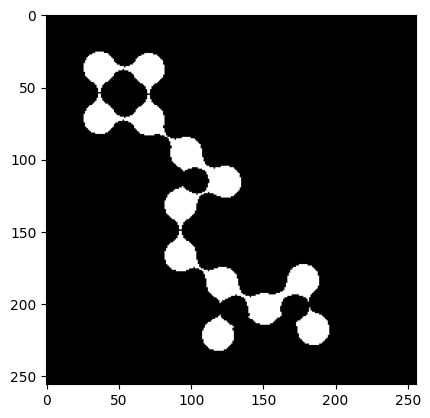

In [19]:
# Erosion
kernel = disc_kernel(8)
erosion = cv2.erode(img, kernel, iterations=1)
plt.imshow(erosion,cmap='gray')

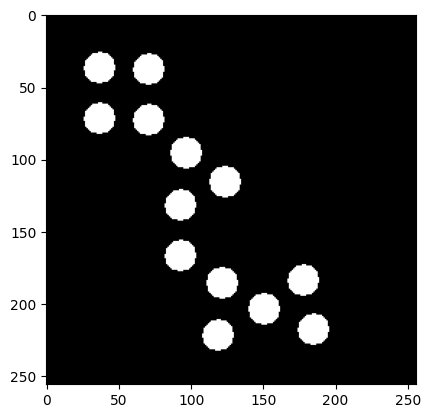

In [24]:
# Opening
kernel = disc_kernel(9)
opening = cv2.morphologyEx(erosion, cv2.MORPH_OPEN, kernel, iterations=1)
plt.imshow(opening,cmap='gray')

In [70]:
# Count total number of balls present in this image
contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of balls:',len(contours))

Number of balls: 13


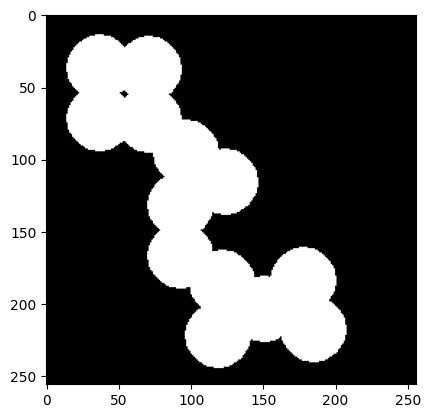

In [42]:
# Dilation
kernel = disc_kernel(4)
dilation = cv2.dilate(img, kernel, iterations=1)
plt.imshow(dilation,cmap='gray')

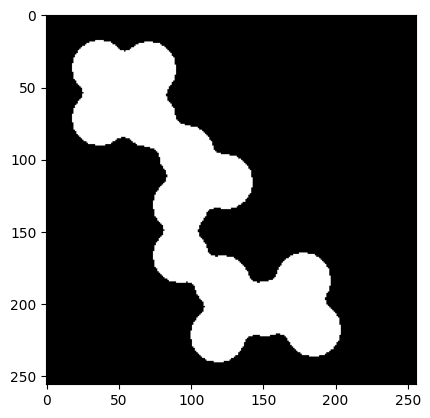

In [72]:
# Closing
kernel = disc_kernel(6)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel, iterations=1)
plt.imshow(closing,cmap='gray')

# ***Lab Task 2:  Remove the noise from figure and then fill the holes or gap between thumb impression.***

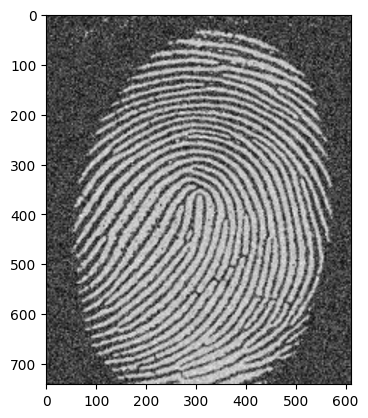

In [73]:
img1 = abs(255-cv2.imread('finger.jpg'))
img1 = cv2.resize(img1, (img1.shape[1]*3,img1.shape[0]*3))
plt.imshow(img1,cmap='gray')

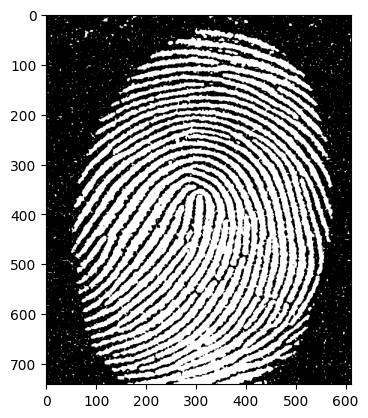

In [35]:
# Thresholding
 (thresh, img1) = cv2.threshold(img1, 110, 255, cv2.THRESH_BINARY)
plt.imshow(img1,cmap='gray')

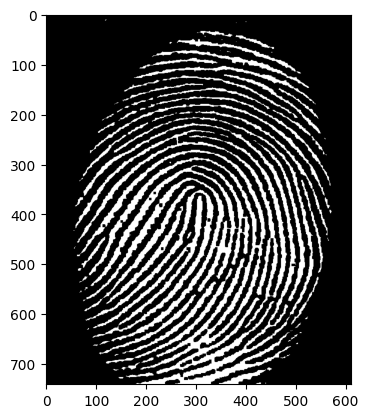

In [36]:
# Erosion
kernel = np.ones((5,5),np.uint8)
eroded = cv2.erode(img1, kernel, iterations=1)
plt.imshow(eroded)

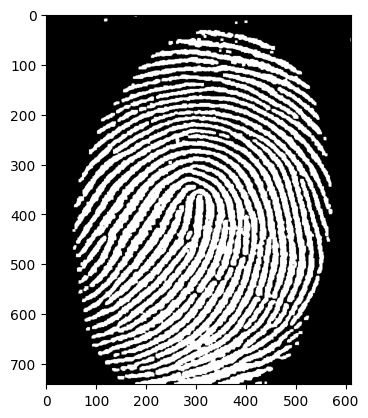

In [37]:
# Dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(eroded, kernel, iterations=2)
plt.imshow(dilated)

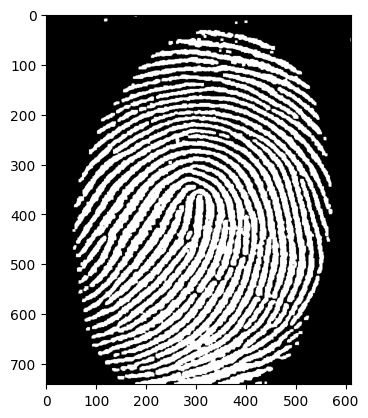

In [38]:
# Opening
kernel = np.ones((3,3),np.uint8)
open = cv2.morphologyEx(img1, cv2.MORPH_OPEN, kernel, iterations=2)
plt.imshow(open,cmap='gray')

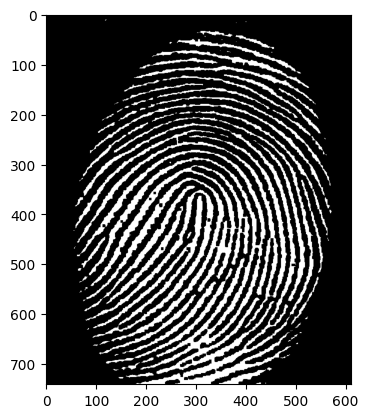

In [45]:
# Closing
kernel = np.ones((3,3),np.uint8)
close = cv2.morphologyEx(eroded, cv2.MORPH_CLOSE, kernel, iterations=2)
plt.imshow(close,cmap='gray')

# ***Lab Task 3:  Perform gray scale 3x3 dilation and erosion on figure. Also find Morphological gradient.***

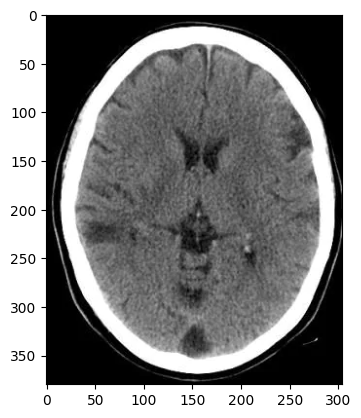

In [74]:
ctscan = cv2.imread('/content/15141tn.jpg')
ctscan = cv2.cvtColor(ctscan, cv2.COLOR_BGR2GRAY)
plt.imshow(ctscan,cmap='gray')

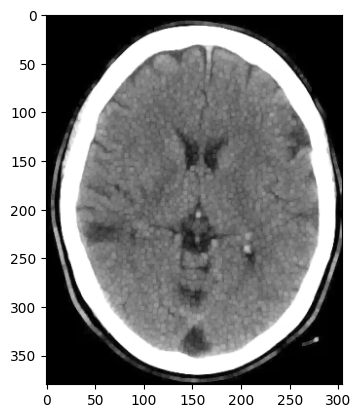

In [75]:
# Dilation
kernel = np.ones((3, 3), np.uint8)
dil = cv2.dilate(ctscan, kernel)
plt.imshow(dil,cmap='gray')

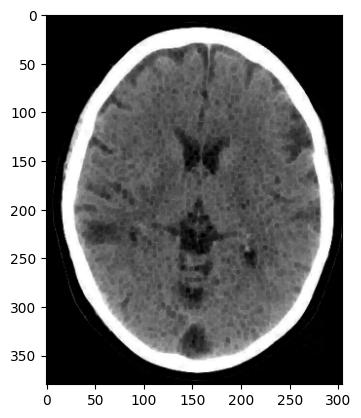

In [76]:
# Erosion
eros = cv2.erode(ctscan, kernel)
plt.imshow(eros,cmap='gray')

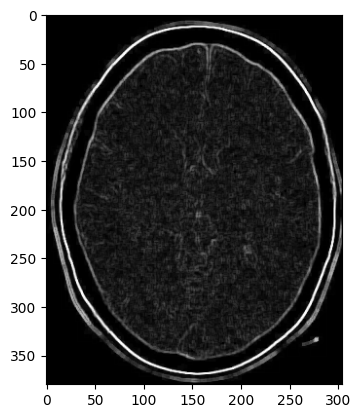

In [77]:
# Gradient
grad = cv2.subtract(dil, eros)
plt.imshow(grad,cmap='gray')

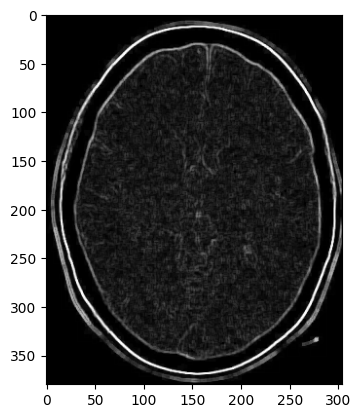

In [79]:
# Morphological Gradient = Dilation - Erosion
morph_grad = cv2.morphologyEx(ctscan, cv2.MORPH_GRADIENT, kernel)
plt.imshow(morph_grad,cmap='gray')